In [1]:
import keras
import numpy as np

from keras.models import load_model
from keras.utils import to_categorical


# load trained model for visualization
cae = load_model('trained_cae.h5')

encoder = load_model('trained_encoder.h5')
decoder = load_model('trained_decoder.h5')


model = cae


M = 128
L = 5
numepochs = 25


# One hot encoding
rawdata = np.zeros(M)
i = 0
while(i<M):
    rawdata[i] = i
    i += 1

data = to_categorical(rawdata)
#from numpy import reshape
data = data.astype(int)
ydata = np.reshape(data, (data.shape[0], 1, 1, data.shape[1]))
yvaldata = ydata
xdata = np.reshape(data, (data.shape[0], 1, 1, data.shape[1]))
xvaldata = xdata

print('done')

Using TensorFlow backend.


done


In [2]:
class_idx = ydata[0]
#indices = y_test[:, 0]
#indices = np.where(ydata[:, class_idx] == 1.)[0]
indices = ydata

idx = ydata[0]
#idx = indices[0]
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (128, 6)
#plt.imshow(idx[:])
model.summary()
model.layers[1].summary()
model.layers[2].summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 1, 1, 128)         0         
_________________________________________________________________
model_2 (Model)              (None, 5, 5, 1)           370001    
_________________________________________________________________
model_1 (Model)              (None, 1, 1, 128)         1435136   
Total params: 1,805,137
Trainable params: 1,802,289
Non-trainable params: 2,848
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 1, 1, 128)         0         
_________________________________________________________________
dense_3 (Dense)              (None, 1, 1, 128)         16512     
______________________________________________________________

In [4]:
activations = encoder.predict(xdata)
#print(activations[0])
#print(activations[0])
inp = xdata

In [5]:
dim1 = np.sqrt(M)
if (np.mod(dim1, 1) == 0):
    dim2 = dim1
else:
    dim1 = np.sqrt(M/2)
    dim2 = M/dim1



In [6]:
from vis.visualization import visualize_saliency
from vis.utils import utils
from keras import activations

layer_idx = utils.find_layer_idx(model.layers[2], 'conv2d_2')
print(layer_idx)
model.layers[-1].activation = activations.linear
model = utils.apply_modifications(model)

6


AttributeError: Layer model_2 has multiple inbound nodes, hence the notion of "layer input" is ill-defined. Use `get_input_at(node_index)` instead.

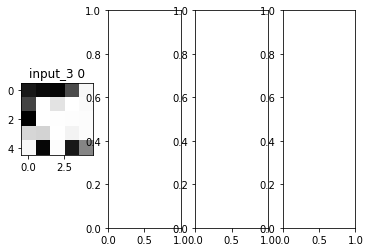

In [7]:
for index in [0]:  
    for model_num in [1, 2]:
        for layer_idx in np.arange(10):
            activations = encoder.predict(xdata)
            #print(activations[0])
            #print(activations[index])
            inp = activations[index]

            f, ax = plt.subplots(1, 4)
            # displays input
            ax[0].set_title(model.layers[model_num].layers[layer_idx].name + ' ' + str(index))
            ax[0].imshow(inp[:, ..., 0], cmap='binary')

            for i, modifier in enumerate([None, 'guided', 'relu']):
                grads = visualize_saliency(model.layers[model_num], layer_idx, filter_indices=None, 
                                           seed_input=inp, backprop_modifier=modifier)
                if modifier is None:
                    modifier = 'vanilla'
                ax[i+1].set_title(modifier)    
                ax[i+1].imshow(grads, cmap='binary')